# TASK - 3 CUSTOMER CHURN PREDICTION USING MACHINE LEARNING ALGORITHM (Logistic Regression) at CODSOFT Internship

# IMPORTING THE LIBRARIES WHICH IS REQUIRED

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Internship Task\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# LET'S DISCOVER OUR DATA PROPERLY (EDA)

In [5]:
# Let's check on the null values if presented in it

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Okay, we are good to go, there is no null value detected

In [6]:
# dropping the first 1 and 3 columns from the data

df.drop(['RowNumber', 'Surname'], axis = 1, inplace = True)

In [7]:
df.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Perfect so let's describe our datasets

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's Explain about what is the purpose of this method.

(1) Count: It will count your overall dataset without adding any null values.

(2) Mean: It will take the average value of data in each column.

(3) Std(Standard Deviation): Measures the spread of each column in a dataset.

(4) Min: It represents the smallest value in the dataset.

(5) 25%(1st Quartile): It indicates the boundary of the lower 25% of the data.

(6) 50%(Median or 2nd Quartile): It separates the lower 50% from the upper 50% of the data.

(7) 75%(3rd Quartile): It indicates the boundary of the lower 75% of the data.

(8) Max: It represents the largest value in the dataset.

In [9]:
# Let's dive onto the Info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


So, there is only 2 objects which should be converted to numeric (Geography, Gender).

In [10]:
# Let's check on How much Country is prsent

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

As you can visualize there are only 3 countries so we can simply encode it with giving them a specific value.

Before Preprocesing our data we'll Visualize it first.

# LET'S VISUALIZE OUR DATASET

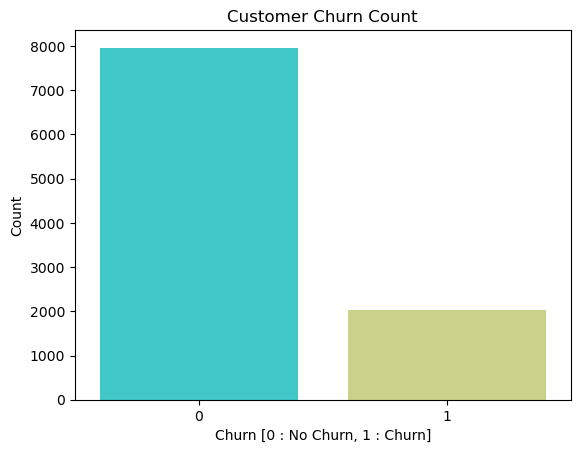

In [33]:
# Plotting the Customer Churn on the basis of their Count

sns.countplot(x = 'Exited', data = df, palette = 'rainbow')
plt.title('Customer Churn Count')
plt.xlabel('Churn [0 : No Churn, 1 : Churn]')
plt.ylabel('Count')
plt.show()

In [40]:
# There are 7963 peoples who are not churned and 2037 who have been churned

df['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


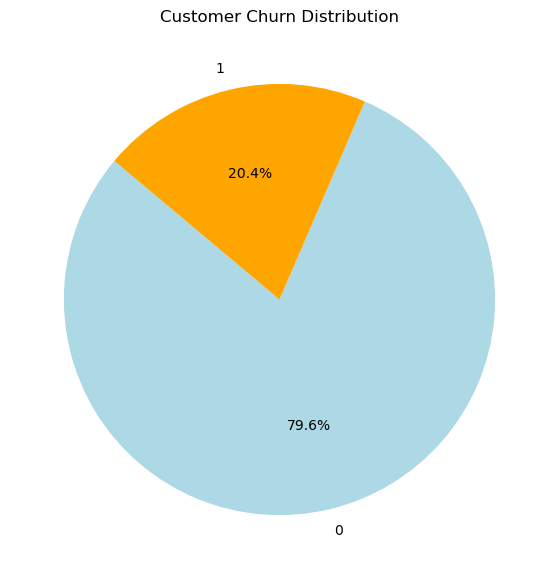

In [42]:
# Group the data by 'Churn' and calculate the count
churn_counts = df['Exited'].value_counts()
colors = ['lightblue', 'orange']

# Creating a pie chart
plt.figure(figsize=(8, 7))
plt.pie(churn_counts, labels = churn_counts.index, colors = colors, autopct = '%1.1f%%', startangle = 140)
plt.title('Customer Churn Distribution')
plt.show()

# CUSTOMER CHURN BASED ON THEIR COUNTRY

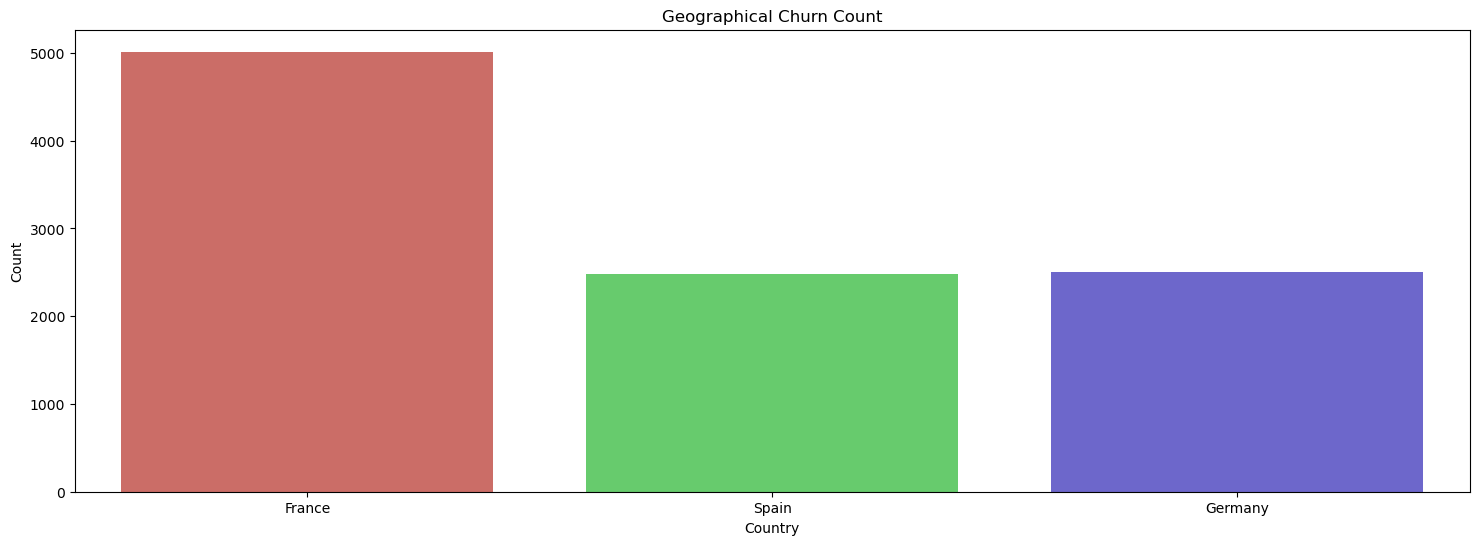

In [50]:
# Plotting customer from their respective country who are cooperating with Bank

plt.figure(figsize = (18, 6))
sns.countplot(x = 'Geography', data = df, palette = 'hls')
plt.title('Geographical Churn Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

So, you can see that France is leading with close to 5000 and rest Spain & Germany they are very far.

# DATA PREPROCESSING

In [52]:
# Let's change Geography and Gender into numeric

geo_name = {
    'France' : 0,
    'Spain' : 1,
    'Germany' : 2
}

df['Geography'] = df['Geography'].map(geo_name)

In [53]:
gen_change = {
    'Female' : 0,
    'Male' : 1
}

df['Gender'] = df['Gender'].map(gen_change)

In [54]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [56]:
# Checking whether any object type left behind

df.dtypes

CustomerId           int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# SPLITTING THE MODEL INTO TRAINING AND TESTING

In [62]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Model Has been split into training and testing sets Successfully')

Model Has been split into training and testing sets Successfully


# FEATURE SCALING OUR MODEL

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
print(X_train[:10])

[[ 0.16958176  0.31701997 -1.09168714 -0.46460796  0.00666099 -1.21571749
   0.8095029   0.64259497 -1.03227043  1.10643166]
 [-2.30455945  1.52644283  0.91601335  0.30102557 -1.37744033 -0.00631193
  -0.92159124  0.64259497  0.9687384  -0.74866447]
 [-1.19119591 -0.89240289 -1.09168714 -0.94312892 -1.031415    0.57993469
  -0.92159124  0.64259497 -1.03227043  1.48533467]
 [ 0.03556578  0.31701997  0.91601335  0.10961719  0.00666099  0.47312769
  -0.92159124  0.64259497 -1.03227043  1.27652776]
 [ 2.05611444  0.31701997 -1.09168714  1.73658844  1.04473698  0.8101927
   0.8095029   0.64259497  0.9687384   0.55837842]
 [ 1.29325423  1.52644283 -1.09168714 -0.17749539 -1.031415    0.44253504
   0.8095029   0.64259497 -1.03227043  1.63252134]
 [ 1.6128308  -0.89240289  0.91601335  0.77954653 -1.37744033  0.30432823
  -0.92159124 -1.55619021 -1.03227043  0.48149647]
 [-0.54173384  0.31701997  0.91601335  0.20532138  1.04473698 -1.21571749
   0.8095029   0.64259497  0.9687384   1.07382167]
 

In [65]:
print(X_test[:10])

[[-0.55204276  1.52644283 -1.09168714 -0.36890377  1.04473698  0.8793029
  -0.92159124  0.64259497  0.9687384   1.61085707]
 [-1.31490297 -0.89240289 -1.09168714  0.10961719 -1.031415    0.42972196
  -0.92159124  0.64259497 -1.03227043  0.49587037]
 [ 0.57162971  0.31701997 -1.09168714  0.30102557  1.04473698  0.30858264
  -0.92159124  0.64259497  0.9687384  -0.42478674]
 [ 1.41696129 -0.89240289  0.91601335 -0.65601634 -0.33936434  0.57533623
  -0.92159124 -1.55619021 -1.03227043 -0.18777657]
 [ 0.57162971  1.52644283  0.91601335 -0.08179119  0.00666099  1.38961097
   0.8095029   0.64259497  0.9687384   0.61684179]
 [ 0.20050853  0.31701997 -1.09168714  1.73658844 -0.68538967  1.5900207
   0.8095029   0.64259497 -1.03227043 -0.01930192]
 [-0.62420521  0.31701997  0.91601335 -0.46460796 -1.72346566 -0.1640232
   0.8095029  -1.55619021  0.9687384   1.04587113]
 [-0.14999481  0.31701997 -1.09168714 -0.94312892  0.35268632  1.30238547
   0.8095029   0.64259497  0.9687384   0.01616599]
 [-

# TRAINING OUR MODEL USING LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print('Model Has Trained Successfuly')

Model Has Trained Successfuly


# LET'S PREDICT OUR MODEL 

In [71]:
print('The Predicted value of Exited(Churn) is: ', model.predict(scaler.transform([[699, 0, 0, 39, 1, 0.00, 2, 0, 0, 93826.63]])))
print()
print('The Predicted value of Exited(Churn) is: ', model.predict(scaler.transform([[653, 2, 1, 58, 1, 132602.88, 1, 1, 0, 5097.67]])))

The Predicted value of Exited(Churn) is:  [0]

The Predicted value of Exited(Churn) is:  [1]


# NOW LET'S MERGE THEM TOGETHER (The Predicted value and The Actual Value)

In [77]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:40])

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


As you can see in some cases the model didn't predict as expected, but let's see the confusion_matrix and accuracy_score

# BUILDING THE MODEL ACCURACY SCORE AND PREDICTION RESULT VIA CONFUSION MATRIX

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix on the Predicted Test Result is\n', cm)
print()
print('Model Accuracy Score is\n', accuracy_score(y_test, y_pred))

Confusion Matrix on the Predicted Test Result is
 [[1531   64]
 [ 314   91]]

Model Accuracy Score is
 0.811


CONFUSION MATRIX RESULT:

True Positives (TP): 1531
True Negatives (TN): 91
False Positives (FP): 64
False Negatives (FN): 314

MODEL PREDICTED RESULT(Correct):
True Positives clearly indicates that the customer don't want to Churn and it is correctly executed by the model.
True Negatives indicates that the customer want to Churn and it is also correct.

MODEL PREDICTED RESULT(Wrong):
False Positives are the values which the customer don't want to churn, but our model predicted that they want to churn.
False Negatives are the values which the customer want to Churn, but our model predicted they don.t want to Churn.


ACCURACY SCORE:

The Model has performed 81% of the accuracy score that was not expected using Logistic Regression.

Accuracy Score is calculated by:

[(THE NUMBER OF TRUE POSITIVES) + (THE NUMBER OF TRUE NEGATIVES) / (TOTAL NUMBER OF TEST SIZE)]

1531 + 91 / 2000 = 0.811

In [83]:
report = classification_report(y_test, y_pred)

print('The Classification Reports of the Model Performed is \n ', report)

The Classification Reports of the Model Performed is 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.22      0.33       405

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



(1) Precision tells you how many of the positive predictions were actually correct. It is calculated by
                                       Precision = True Positives(TP) / (TP + FP)
                                         
(2) Recall tells you how many of the actual positive instances were correctly predicted.It is calculated by
                                       Recall = TP / (TP + FN)
                                       FN : False Negatives
                                       
(3) F1-Score combines precision and recall into a single metric, balancing both aspects. It is calculated by
                                       F1-Score = 2*(Precision * Recall) / (Precision + Recall)
                                       
(4) Support provides context by showing how many samples belong to each class.